In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%pip install catboost
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import xgboost
# import lightgbm as lgb
# from lightgbm import LGBMClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("train.csv")
print(df.shape)
display(df.nunique())
df.head()

(50000, 58)


RecordID                         50000
hospital_id                        146
icu_id                             235
ethnicity                            6
gender                               2
icu_admit_source                     5
icu_stay_type                        3
icu_type                             8
apache_3j_bodysystem                11
apache_2_bodysystem                 10
age                                 74
elective_surgery                     2
pre_icu_los_days                  6691
apache_2_diagnosis                  44
apache_3j_diagnosis                386
apache_post_operative                2
gcs_eyes_apache                      4
gcs_motor_apache                     6
gcs_unable_apache                    2
gcs_verbal_apache                    5
heart_rate_apache                  147
intubated_apache                     2
resprate_apache                     66
temp_apache                        174
ventilated_apache                    2
d1_diasbp_min            

,RecordID,hospital_id,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis,hospital_death
0,1,126,1931,Caucasian,M,Floor,transfer,Med-Surg ICU,Metabolic,Metabolic,...,86,93.0,86.0,NaN,NaN,0.01,0.00,0,0,0
1,2,112,1544,African American,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular,...,95,95.0,95.0,333.0,3.7,NaN,NaN,0,0,0
2,3,153,1517,Caucasian,M,Floor,admit,MICU,Respiratory,Respiratory,...,162,174.0,162.0,160.0,4.2,0.38,0.15,0,0,0
3,4,109,1811,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic,...,140,163.0,140.0,258.0,3.8,0.12,0.06,0,0,0
4,5,287,1845,Caucasian,F,Accident & Emergency,admit,CSICU,Cardiovascular,Cardiovascular,...,119,119.0,119.0,110.0,3.9,0.15,0.07,0,0,0


In [ ]:
df.isna().sum()


RecordID                            0
hospital_id                         0
icu_id                              0
ethnicity                         140
gender                              1
icu_admit_source                   15
icu_stay_type                       0
icu_type                            0
apache_3j_bodysystem               62
apache_2_bodysystem                62
age                               439
elective_surgery                    1
pre_icu_los_days                    1
apache_2_diagnosis                 63
apache_3j_diagnosis                12
apache_post_operative               1
gcs_eyes_apache                    94
gcs_motor_apache                   94
gcs_unable_apache                  12
gcs_verbal_apache                  94
heart_rate_apache                   2
intubated_apache                    1
resprate_apache                    18
temp_apache                       286
ventilated_apache                   1
d1_diasbp_min                       1
d1_diasbp_no

In [ ]:
df.describe()


In [ ]:
test = pd.read_csv("test.csv")
print(test.shape)
display(test.nunique())
test.head()

(30000, 57)


RecordID                         30000
hospital_id                        144
icu_id                             234
ethnicity                            6
gender                               2
icu_admit_source                     5
icu_stay_type                        3
icu_type                             8
apache_3j_bodysystem                11
apache_2_bodysystem                 10
age                                 74
elective_surgery                     2
pre_icu_los_days                  5054
apache_2_diagnosis                  44
apache_3j_diagnosis                369
apache_post_operative                2
gcs_eyes_apache                      4
gcs_motor_apache                     6
gcs_unable_apache                    2
gcs_verbal_apache                    5
heart_rate_apache                  146
intubated_apache                     2
resprate_apache                     67
temp_apache                        162
ventilated_apache                    2
d1_diasbp_min            

,RecordID,hospital_id,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,...,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis
0,50001,267,1658,Caucasian,F,Accident & Emergency,admit,CCU-CTICU,Cardiovascular,Cardiovascular,...,167,121,167.0,121.0,117.0,4.4,0.02,0.01,0,0
1,50002,161,1487,Other/Unknown,M,Accident & Emergency,admit,Neuro ICU,Neurological,Neurologic,...,159,94,159.0,94.0,136.0,3.5,0.85,0.80,0,0
2,50003,287,1845,Caucasian,M,Floor,transfer,CSICU,Cardiovascular,Cardiovascular,...,126,108,126.0,108.0,228.0,4.2,0.15,0.07,0,0
3,50004,170,1373,Other/Unknown,F,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic,...,142,127,142.0,127.0,443.0,3.2,0.09,0.04,0,0
4,50005,276,1747,African American,F,Accident & Emergency,admit,CCU-CTICU,Respiratory,Respiratory,...,110,110,110.0,110.0,219.0,3.6,0.13,0.07,0,0


In [ ]:
test.isna().sum()


In [ ]:
print([c for c in df.columns if 7<df[c].nunique()<800])


In [ ]:
print([c for c in df.columns if (1<df[c].nunique()) & (df[c].dtype != np.number)& (df[c].dtype != int) ])

In [ ]:
categorical_cols =  ['hospital_id',
 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']

In [ ]:
display(df[categorical_cols].dtypes)
display(df[categorical_cols].tail(3))
display(df[categorical_cols].isna().sum())

In [ ]:
df[categorical_cols] = df[categorical_cols].fillna("")

# same transformation for test data
test[categorical_cols] = test[categorical_cols].fillna("")

df[categorical_cols].isna().sum()

hospital_id             0
ethnicity               0
gender                  0
icu_admit_source        0
icu_stay_type           0
icu_type                0
apache_3j_bodysystem    0
apache_2_bodysystem     0
dtype: int64

In [ ]:
TARGET_COL = "hospital_death"

In [ ]:
X_train = df.drop([TARGET_COL],axis=1)
y_train = df[TARGET_COL]

In [ ]:
## catBoost Pool object
train_pool = Pool(data=X_train,label = y_train,cat_features=categorical_cols)

In [ ]:
## catBoost Pool object
tp = Pool(data=X_train,cat_features=categorical_cols)

In [ ]:
model_basic = CatBoostClassifier(verbose=False,iterations=650,depth=7, learning_rate=0.04, custom_metric= 'Logloss')
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.1516528712743925}}


In [ ]:
model_basic = CatBoostClassifier(verbose=False,iterations=50)#,learning_rate=0.1, task_type="GPU",)
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.1707516897551559}}


In [ ]:
### hyperparameter tuning example grid for catboost :
grid = {'learning_rate': [0.04, 0.1],
        'depth': [7, 11],
#         'l2_leaf_reg': [1, 3,9],
#        "iterations": [500],
       "custom_metric":['Logloss', 'AUC']}

model = CatBoostClassifier()

## can also do randomized search - more efficient typically, especially for large search space - `randomized_search`
grid_search_result = model.grid_search(grid,
                                       train_pool,
                                       plot=True,
                                       refit = True, #  refit best model on all data
                                      partition_random_seed=42)

print(model.get_best_score())

In [ ]:
print("best model params: \n",grid_search_result["params"])


In [ ]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    if score > 0.05:
        print('{0}: {1:.2f}'.format(name, score))

In [ ]:
%pip install shap
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_pool)

# visualize the training set predictions
# SHAP plots for all the data is very slow, so we'll only do it for a sample. Taking the head instead of a random sample is dangerous!
shap.force_plot(explainer.expected_value,shap_values[0,:400], X_train.iloc[0,:400])

In [ ]:
shap.summary_plot(shap_values, X_train)


In [ ]:
model

In [ ]:
test[TARGET_COL] = model.predict(test,prediction_type='Probability')[:,1]


In [ ]:
onehot= pd.get_dummies(df)
onehotTest= pd.get_dummies(test)

In [ ]:
test12 = pd.read_csv('test.csv')

In [ ]:
# Append 'hospital_id' and 'icu_id' to 'onehotTest'
onehotTest['hospital_id'] = test['hospital_id']
onehotTest['icu_id'] = test['icu_id']

In [ ]:
df1 = pd.read_csv("train.csv")


In [ ]:
onehotTest

,RecordID,hospital_id,icu_id,age,elective_surgery,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,gcs_eyes_apache,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,50001,267,1658,61.0,0,0.000000,302.0,105.02,0,4.0,...,1,0,0,0,0,0,0,0,0,0
1,50002,161,1487,80.0,0,0.025000,121.0,401.01,0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,50003,287,1845,79.0,0,0.792361,117.0,106.01,0,4.0,...,1,0,0,0,0,0,0,0,0,0
3,50004,170,1373,51.0,0,0.060417,301.0,403.01,0,2.0,...,0,0,0,0,1,0,0,0,0,0
4,50005,276,1747,56.0,0,0.069444,108.0,203.01,0,3.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,79996,276,1723,64.0,0,0.129167,301.0,403.01,0,3.0,...,0,0,0,0,1,0,0,0,0,0
29996,79997,207,1343,77.0,1,8.865972,202.0,1211.02,1,3.0,...,1,0,0,0,0,0,0,0,0,0
29997,79998,251,1506,72.0,0,0.179167,305.0,901.04,0,4.0,...,0,0,0,0,0,1,0,0,0,0
29998,79999,209,1129,71.0,0,0.011111,124.0,306.01,0,4.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X=onehot.loc[:, onehot.columns != 'hospital_death']
y=df['hospital_death']

In [ ]:
X.shape

(110000, 244)

In [ ]:
df1['hospital_death']

THIS GAVE BEST

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

bg_c = BaggingClassifier(base_estimator=model_basic, n_estimators=450, n_jobs=-1)
bg_c.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_new_predVote = bg_c.predict_proba(onehotTest)
hospital_death = y_new_predVote[:, 1]
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', onehotTest['RecordID'])

# Save the predictions to a CSV file
# predictions_df.to_csv('predictionsCAT.csv', index=False)
# predictions_df.to_csv('predictionsXGB.csv', index=False)
# predictions_df.to_csv('predictionsgb.csv', index=False)
# predictions_df.to_csv('predictionslgb.csv', index=False)
# predictions_df.to_csv('predictionsab.csv', index=False)
predictions_df.to_csv('74.csv', index=False)

In [ ]:
onehotTest.columns

In [ ]:
test[TARGET_COL] = bg_c.predict_proba(test)[:,1]
test[["RecordID","hospital_death"]].to_csv("bag.csv",index=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

bg_c = BaggingClassifier(base_estimator=model, n_estimators=450, n_jobs=-1)
bg_c.fit(X,y)


In [ ]:
test[["RecordID","hospital_death"]].to_csv("CATTTPREDICT.csv",index=False)

In [ ]:
test[TARGET_COL] = model_basic.predict(test,prediction_type='Probability')[:,1]
test[["RecordID","hospital_death"]].to_csv("CATTTPREDICT.csv",index=False)


TRYUNG ANOTHER ONE

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%pip install catboost

from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor
%pip install shap
import shap
shap.initjs()

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import lightgbm as lgb
# from lightgbm import LGBMClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler , OneHotEncoder , LabelEncoder
from sklearn.ensemble import IsolationForest

In [ ]:
def weightedclasst(x):
    """based on : https://www.kaggle.com/c/widsdatathon2020/discussion/127987 but made to use ordinals"""
    if pd.isna(x):
        return np.nan
    if x < 15: return 0
    elif x >= 15 and x < 16: return 1
    elif x >=16 and x < 18.5: return 2
    elif x >= 18.5 and x < 25: return 3
    elif x >= 25 and x < 30: return 4
    elif x >= 30 and x < 35: return 5
    elif x >= 35: return

In [ ]:
df = pd.read_csv("train.csv")
# print(df.shape)
# display(df.nunique())
# df.head()

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
df["icu_id_isin_test"] = df['icu_id'].isin(test['icu_id'])
test["icu_id_isin_test"] = True

test["icu_id_isin_train"] = test['icu_id'].isin(df['icu_id'])
df["icu_id_isin_train"] = True


df["hospital_id_isin_test"] = df['hospital_id'].isin(test['hospital_id'])
test["hospital_id_isin_test"] = True

test["hospital_id_isin_train"] = test['hospital_id'].isin(df['hospital_id'])
df["hospital_id_isin_train"] = True

In [ ]:
test[["hospital_id_isin_train","icu_id_isin_train"]].describe()


,hospital_id_isin_train,icu_id_isin_train
count,30000,30000
unique,1,2
top,True,True
freq,30000,29999


In [ ]:
USELESS_COLS = [
                "hospital_id_isin_train","icu_id_isin_train","icu_id_isin_test",
#                 'icu_id'  # doesn't cover test ?  - we still keep hospital ID though - which is as bad - we still want it for a count feature maybe?
               ]

In [ ]:
df = pd.concat([df,test])

df.drop(USELESS_COLS,axis=1,inplace=True)
print(df.shape)

(71643, 59)


In [ ]:
cardinal_cols = [c for c in df.columns if( 1<df[c].nunique()<3000)]
cardinal_cols =  [c for c in cardinal_cols if not((c.startswith("h1")) | (c.startswith("d1")))]
print(len(cardinal_cols))
print(cardinal_cols)

29
['hospital_id', 'icu_id', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'age', 'elective_surgery', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'immunosuppression', 'solid_tumor_with_metastasis', 'hospital_death', 'hospital_id_isin_test']


In [ ]:
df[cardinal_cols].nunique()


hospital_id                      146
icu_id                           236
ethnicity                          6
gender                             2
icu_admit_source                   5
icu_stay_type                      3
icu_type                           8
apache_3j_bodysystem              11
apache_2_bodysystem               10
age                               74
elective_surgery                   2
apache_2_diagnosis                44
apache_3j_diagnosis              391
apache_post_operative              2
gcs_eyes_apache                    4
gcs_motor_apache                   6
gcs_unable_apache                  2
gcs_verbal_apache                  5
heart_rate_apache                148
intubated_apache                   2
resprate_apache                   71
temp_apache                      186
ventilated_apache                  2
apache_4a_hospital_death_prob    101
apache_4a_icu_death_prob          99
immunosuppression                  2
solid_tumor_with_metastasis        2
h

In [ ]:
TARGET_COL='hospital_death'

In [ ]:
df["row_nan_sum"] = df.drop([TARGET_COL,"hospital_id_isin_test"],axis=1).isna().sum(axis=1)


In [ ]:
df["row_zero_count"] = (df.drop([TARGET_COL,"hospital_id_isin_test"],axis=1) == 0).sum(axis=1)
df['apache_4a_icu_death_prob'] = df['apache_4a_icu_death_prob'].replace(-1,np.nan)
df['apache_4a_hospital_death_prob'] = df['apache_4a_hospital_death_prob'].replace(-1,np.nan)
df["max_apache_4a_death_prob"] = df[['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']].max(axis=1)

In [ ]:
## count missing values in d1 labs , and h1 labs
d_cols = [c for c in df.columns if(c.startswith("d1"))]
h_cols = [c for c in df.columns if(c.startswith("h1"))]

df["dailyLabs_row_nan_count"] = df[d_cols].isna().sum(axis=1)
df["hourlyLabs_row_nan_count"] = df[h_cols].isna().sum(axis=1)

df["diff_labTestsRun_daily_hourly"] = df["dailyLabs_row_nan_count"] - df["hourlyLabs_row_nan_count"]

In [ ]:
lab_col = [c for c in df.columns if((c.startswith("h1")) | (c.startswith("d1")))]
df[lab_col].isna().mean()


d1_diasbp_min                0.000000
d1_diasbp_noninvasive_min    0.000000
d1_heartrate_max             0.000000
d1_mbp_min                   0.000000
d1_mbp_noninvasive_min       0.001926
d1_resprate_max              0.000181
d1_spo2_min                  0.000810
d1_sysbp_min                 0.000000
d1_sysbp_noninvasive_min     0.000000
d1_temp_min                  0.015535
h1_diasbp_min                0.000028
h1_diasbp_noninvasive_min    0.000307
h1_heartrate_max             0.000600
h1_heartrate_min             0.000614
h1_mbp_max                   0.006309
h1_mbp_min                   0.006309
h1_mbp_noninvasive_max       0.014572
h1_mbp_noninvasive_min       0.014572
h1_resprate_max              0.012381
h1_resprate_min              0.012381
h1_spo2_max                  0.010469
h1_spo2_min                  0.010469
h1_sysbp_max                 0.000014
h1_sysbp_min                 0.000014
h1_sysbp_noninvasive_max     0.000307
h1_sysbp_noninvasive_min     0.000307
d1_glucose_m

In [ ]:
lab_col_names = list(set(list(map(lambda i: i[ 3 : -4], lab_col))))


In [ ]:
df["apache_2_diagnosis_count"] = df.groupby(["apache_2_diagnosis"])["RecordID"].transform("size")
df["apache_3j_diagnosis_count"] = df.groupby(["apache_3j_diagnosis"])["RecordID"].transform("size")

## V18
df["apache_3j_bodysystem_count"] = df.groupby(["apache_3j_bodysystem"])["RecordID"].transform("size")
df["apache_2_bodysystem_count"] = df.groupby(["apache_2_bodysystem"])["RecordID"].transform("size")

apache_4a_hospital_death_prob    6491
apache_4a_icu_death_prob         6429
dtype: int64


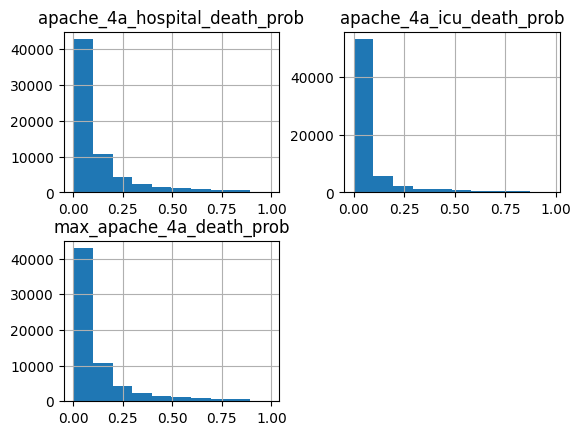

In [ ]:
print(df[['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',]].isna().sum())

df[['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',"max_apache_4a_death_prob"]].hist();


In [ ]:
df["apache_2_diagnosis"] = df["apache_2_diagnosis"].fillna(0)

# df["int_apache_3j_diag"] = df["apache_3j_diagnosis"].fillna(0).astype("Int64")  ## gives error -  cannot safely cast non-equivalent float64 to int64
df["int_apache_3j_diag"] =  df["apache_3j_diagnosis"].fillna(0).astype(str).str.split(".",expand=True)[0].astype(int)

df.tail()[["int_apache_3j_diag","apache_3j_diagnosis","apache_2_diagnosis"]].drop_duplicates()

,int_apache_3j_diag,apache_3j_diagnosis,apache_2_diagnosis
29995,403,403.01,301.0
29996,1211,1211.02,202.0
29997,901,901.04,305.0
29998,306,306.01,124.0
29999,1206,1206.03,203.0


In [ ]:
df["apache_2_diagnosis"].describe()


count    71643.00000
mean       181.34450
std         86.82427
min          0.00000
25%        113.00000
50%        122.00000
75%        301.00000
max        308.00000
Name: apache_2_diagnosis, dtype: float64

In [ ]:
df[["int_apache_3j_diag","apache_3j_diagnosis","apache_2_diagnosis"]].nunique()


int_apache_3j_diag     112
apache_3j_diagnosis    391
apache_2_diagnosis      45
dtype: int64

In [ ]:
df["apache_3j_diagnosis"].astype(str).apply(len).describe()


count    71643.000000
mean         6.156456
std          0.436359
min          3.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          7.000000
Name: apache_3j_diagnosis, dtype: float64

In [ ]:
df.loc[df["apache_2_diagnosis"].astype(str).str.len()<4][["apache_2_diagnosis","apache_3j_diagnosis"]]


,apache_2_diagnosis,apache_3j_diagnosis
185,0.0,NaN
398,0.0,0.25
571,0.0,0.25
580,0.0,NaN
695,0.0,NaN
...,...,...
28907,0.0,NaN
29347,0.0,NaN
29738,0.0,NaN
29851,0.0,0.25


In [ ]:
df.head(10)[["int_apache_3j_diag","apache_3j_diagnosis","apache_2_diagnosis"]].drop_duplicates()


,int_apache_3j_diag,apache_3j_diagnosis,apache_2_diagnosis
0,703,703.03,122.0
1,109,109.09,302.0
2,212,212.01,106.0
3,403,403.01,301.0
4,106,106.01,117.0
5,501,501.06,113.0
6,1505,1505.01,218.0
7,602,602.15,118.0
8,104,104.01,110.0
9,107,107.01,112.0


In [ ]:
df["grouped_apache_3j_diag"] = df['int_apache_3j_diag'].fillna(0).astype(int).apply(lambda x: round(x,-2))//100


In [ ]:
df.head(10)[["grouped_apache_3j_diag", "int_apache_3j_diag"]].drop_duplicates()


,grouped_apache_3j_diag,int_apache_3j_diag
0,7,703
1,1,109
2,2,212
3,4,403
4,1,106
5,5,501
6,15,1505
7,6,602
8,1,104
9,1,107


In [ ]:
df[["grouped_apache_3j_diag", "int_apache_3j_diag"]].nunique()


grouped_apache_3j_diag     21
int_apache_3j_diag        112
dtype: int64

In [ ]:
df = df*1  ## force booleans to be integers


In [ ]:
clf = IsolationForest(n_estimators=120, max_samples=1100, max_features=0.9, n_jobs=3,contamination='auto')
clf2 = IsolationForest(n_estimators=150, max_samples=600, max_features=1.0, n_jobs=3, contamination='auto')

In [ ]:
c_cols = [c for c in df.columns if df[c].dtype =="O"]
print(c_cols)


['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [ ]:
### pd.set_option('use_inf_as_na', True)  - to handle infs
# X = df._get_numeric_data().drop([TARGET_COL],axis=1).copy()
X = df.drop([TARGET_COL],axis=1).copy()

X.replace([np.inf, -np.inf], np.nan,inplace=True)

for c in c_cols:
    le = LabelEncoder()
    X[c] = le.fit_transform(X[c].astype(str))

X = X.drop(["hash_person_profile","icu_id","hospital_id","hash_person_profile_apache_death_risk_mean"],axis=1,errors="ignore")*1
# X = X.fillna(-1)
# X = X*1  ## force booleans to be integers

X.dropna(thresh = 1000, axis = 1,inplace=True)
print(X.shape)
## https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
# label encode (could also one hot) transform object cols
# X.dtypes()

(71643, 68)


In [ ]:
clf.fit(X.fillna(-1))
df["isolation_forest_score_1"] = clf.score_samples(X.fillna(-1))

In [ ]:
thresh = len(X) * .5
X.dropna(thresh = thresh, axis = 1,inplace=True)
print(X.shape)
X.fillna(X.median(),inplace=True)
print("filled")
clf2.fit(X)
df["isolation_forest_score_2"] = clf2.score_samples(X)

(71643, 68)
filled


In [ ]:
del(X)


In [ ]:
df.drop(["icu_id","hospital_id"],axis=1).loc[~df[TARGET_COL].isna()].to_csv("wids_train_v3.csv.gz",index=False,compression="gzip")
df.drop(["icu_id","hospital_id"],axis=1).loc[df[TARGET_COL].isna()].to_csv("wids_test_v3.csv.gz",index=False,compression="gzip")

In [ ]:
print([c for c in df.columns if 7<df[c].nunique()<800])


['hospital_id', 'icu_id', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'age', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'heart_rate_apache', 'resprate_apache', 'temp_apache', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_spo2_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_temp_min', 'h1_diasbp_min', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_glucose_max', 'd1_potassium_max', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'diff_labTestsRun_daily_hourly', 'row_zero_count', 'max_apache_4a_death_prob', 'apache_2_diagnosis_count', 'apache_3j_diagnosis_count', 'apache_3j_bodysystem_count', 'apache_2_bodysystem_c

In [ ]:
print([c for c in df.columns if (1<df[c].nunique()) & (df[c].dtype != np.number)& (df[c].dtype != int) ])


['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.


In [ ]:
categorical_cols =  [
 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
                     'apache_3j_bodysystem', 'apache_2_bodysystem',
                     "int_apache_3j_diag",
#     "apache_3j_diagnosis",
#     "apache_2_diagnosis",  # fill na fails on it
    "grouped_apache_3j_diag"
                    ]

In [ ]:
display(df[categorical_cols].dtypes)
display(df[categorical_cols].tail(3))
display(df[categorical_cols].isna().sum())

ethnicity                 object
gender                    object
icu_admit_source          object
icu_stay_type             object
icu_type                  object
apache_3j_bodysystem      object
apache_2_bodysystem       object
int_apache_3j_diag         int64
grouped_apache_3j_diag     int64
dtype: object

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,int_apache_3j_diag,grouped_apache_3j_diag
29997,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Genitourinary,Renal/Genitourinary,901,9
29998,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Gastrointestinal,Gastrointestinal,306,3
29999,Caucasian,M,Operating Room / Recovery,admit,CCU-CTICU,Cardiovascular,Cardiovascular,1206,12


ethnicity                 824
gender                      6
icu_admit_source           65
icu_stay_type               0
icu_type                    0
apache_3j_bodysystem      418
apache_2_bodysystem       418
int_apache_3j_diag          0
grouped_apache_3j_diag      0
dtype: int64

In [ ]:
df[categorical_cols] = df[categorical_cols].fillna("").astype(str)

# # same transformation for test data
# test[categorical_cols] = test[categorical_cols].fillna("")

df[categorical_cols].isna().sum()

ethnicity                 0
gender                    0
icu_admit_source          0
icu_stay_type             0
icu_type                  0
apache_3j_bodysystem      0
apache_2_bodysystem       0
int_apache_3j_diag        0
grouped_apache_3j_diag    0
dtype: int64

In [ ]:
df.drop(["icu_id","hospital_id"],axis=1,inplace=True,errors="ignore")


In [ ]:
X_train = df.loc[~df[TARGET_COL].isna()].drop([TARGET_COL],axis=1)
y_train = df.loc[~df[TARGET_COL].isna()][TARGET_COL].astype(int)

test = df.loc[df[TARGET_COL].isna()].drop([TARGET_COL],axis=1)

In [ ]:
display(df[categorical_cols].dtypes)
df[categorical_cols].tail()

ethnicity                 object
gender                    object
icu_admit_source          object
icu_stay_type             object
icu_type                  object
apache_3j_bodysystem      object
apache_2_bodysystem       object
int_apache_3j_diag        object
grouped_apache_3j_diag    object
dtype: object

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,int_apache_3j_diag,grouped_apache_3j_diag
29995,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic,403,4
29996,Hispanic,M,Floor,admit,Med-Surg ICU,Cardiovascular,Cardiovascular,1211,12
29997,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Genitourinary,Renal/Genitourinary,901,9
29998,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Gastrointestinal,Gastrointestinal,306,3
29999,Caucasian,M,Operating Room / Recovery,admit,CCU-CTICU,Cardiovascular,Cardiovascular,1206,12


In [ ]:
## catBoost Pool object
train_pool2 = Pool(data=X_train,label = y_train,
                  cat_features=categorical_cols)

In [ ]:
model_basic2 = CatBoostClassifier(verbose=False,# task_type="CPU",depth=7,
#                                   iterations=7,
                                 metric_period=4,
                                 )
model_basic2.fit(train_pool2, plot=True,silent=True )
print(model_basic2.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.13682322368220642}}


In [ ]:
model2 = CatBoostClassifier(verbose=False, task_type="CPU",depth=10, #eval_metric="AUC",
                           iterations=1600,
                           learning_rate=0.06,
                           metric_period=4)#,learning_rate=0.1, task_type="GPU",)
model2.fit(X_train,y_train,
                  cat_features=categorical_cols,
                  baseline= (0.2 + X_train["max_apache_4a_death_prob"].fillna(X_train["max_apache_4a_death_prob"].mean())), # remove nans..
          plot=True,silent=True)
print(model2.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.014746471283738063}}


In [ ]:
# y_new_predBAG = model_basic2.predict_proba(test)
# hospital_death= y_new_predBAG[:, 1]

# y_new_predBAG2 = model2.predict_proba(test)
# hospital_death2 = y_new_predBAG2[:, 1]

# hospital_death=(hospital_death1+hospital_death2)/2


In [ ]:
test["hospital_death"] =  model2.predict(test,prediction_type='Probability')[:,1]
# pred2 = model_basic2.predict(test,prediction_type='Probability')[:,1]
# test["hospital_death"] = (pred1 + pred2)/2

print("train target mean",df[TARGET_COL].mean())
print("predictions target mean",test["hospital_death"].mean())

train target mean 0.0864031506651938
predictions target mean 0.03964043183895581


In [ ]:
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', test['RecordID'])

# Save the predictions to a CSV file
# predictions_df.to_csv('predictionsCAT.csv', index=False)
predictions_df.to_csv('predictionsTOOMUCH CLEAN.csv', index=False)

In [ ]:
test[["RecordID","hospital_death"]].to_csv("CATTTPREDICT2.csv",index=False)
